In [22]:
import numpy as np
import matplotlib.pyplot as plt
import utils.makeDataset as DatasetMaker
from utils.training import unique_images, get_average_dct
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Supervised classification - With Average DCT

In [23]:
INPUT_DATA_FOLDER = "../output/datasets/"
DATASETS = [1,4,7] # numbers of datasets to train and to test

BL_COMPUTE_AVG = True

### Split the datasets into train and test set, without duplicated image

In [24]:
# New dataset without duplicated image
X = []
y_labels = []

for current_dataset in DATASETS:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=123)

### Random Forest Classifier

score 0.9767441860465116


c:\users\shiti\documents\m2\uv2_projet\projet_py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


cross validation score : 1.0


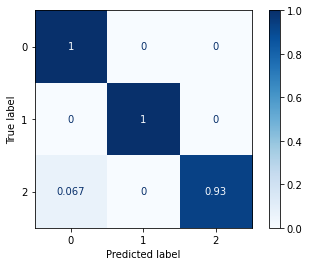

In [25]:
rfc = RandomForestClassifier(max_depth=10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)
print("score", rfc.score(X_test, y_test))
plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

# Cross validation
rfc = RandomForestClassifier(max_depth=10, criterion='entropy')
print('cross validation score :', np.mean(cross_val_score(rfc, new_X, new_y, cv=5)))

### SVM

score 0.9534883720930233
cross validation score : 0.7945812807881774


c:\users\shiti\documents\m2\uv2_projet\projet_py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


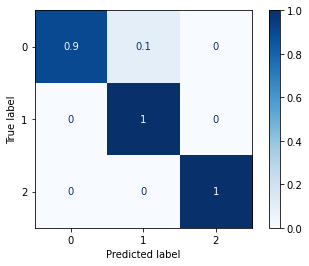

In [26]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X, y)
print("score", svm.score(X_test, y_test))
plot_confusion_matrix(svm, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

# Cross validation
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
print('cross validation score :', np.mean(cross_val_score(svm, new_X, new_y, cv=5)))

### AdaBoost

score 1.0


c:\users\shiti\documents\m2\uv2_projet\projet_py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


cross validation score : 1.0


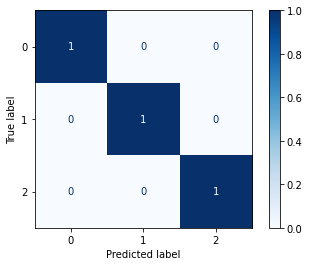

In [27]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
print('score', clf.score(X_test, y_test))
plot_confusion_matrix(clf, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

# Cross validation
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
print('cross validation score :', np.mean(cross_val_score(clf, new_X, new_y, cv=5)))